In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("lending_club_loan.csv")
df = pd.DataFrame(df)
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


<AxesSubplot:xlabel='loan_status', ylabel='count'>

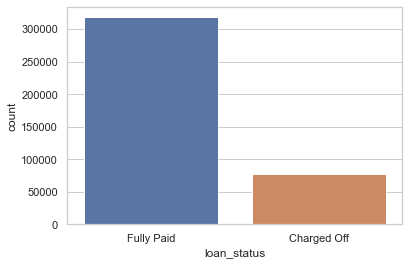

In [3]:
sns.set(style="whitegrid", font_scale=1)
sns.countplot(data=df,x="loan_status")

In [4]:
correlation = df.corr()
display(correlation)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


[Text(0.5, 1.0, 'CORRELATION BETWEEN CONTINOUS DATA')]

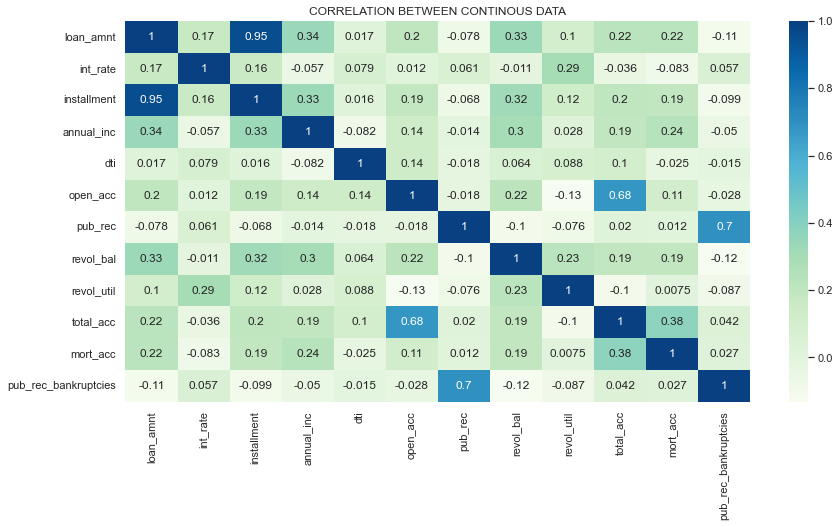

In [5]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize = (14,7))
corr_map = sns.heatmap(correlation,cmap="GnBu",annot=True)
corr_map.set(title ='CORRELATION BETWEEN CONTINOUS DATA')
#No there is no duplicate data, installment shows high correlation with loan amount but it is different from the actual loan amount

[Text(0.5, 1.0, 'RELATIONSHIP BETWEEN LOAN STATUS AND AMOUNT')]

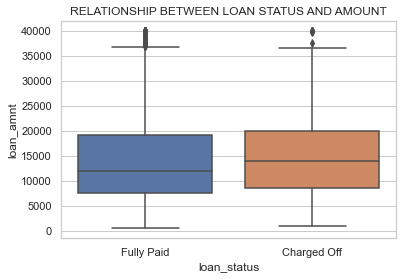

In [6]:
sns.set(style="whitegrid", font_scale=1)
fig, ax = plt.subplots()
bplot = sns.boxplot(x='loan_status',y='loan_amnt',data=df,ax=ax)
bplot.set(title ='RELATIONSHIP BETWEEN LOAN STATUS AND AMOUNT')

In [7]:
df[["loan_amnt","loan_status"]].groupby("loan_status").mean()

,loan_amnt
loan_status,
Charged Off,15126.300967
Fully Paid,13866.878771


In [8]:
df["grade"].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [9]:
df["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

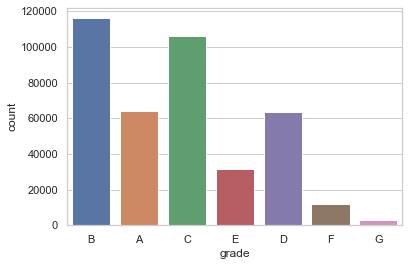

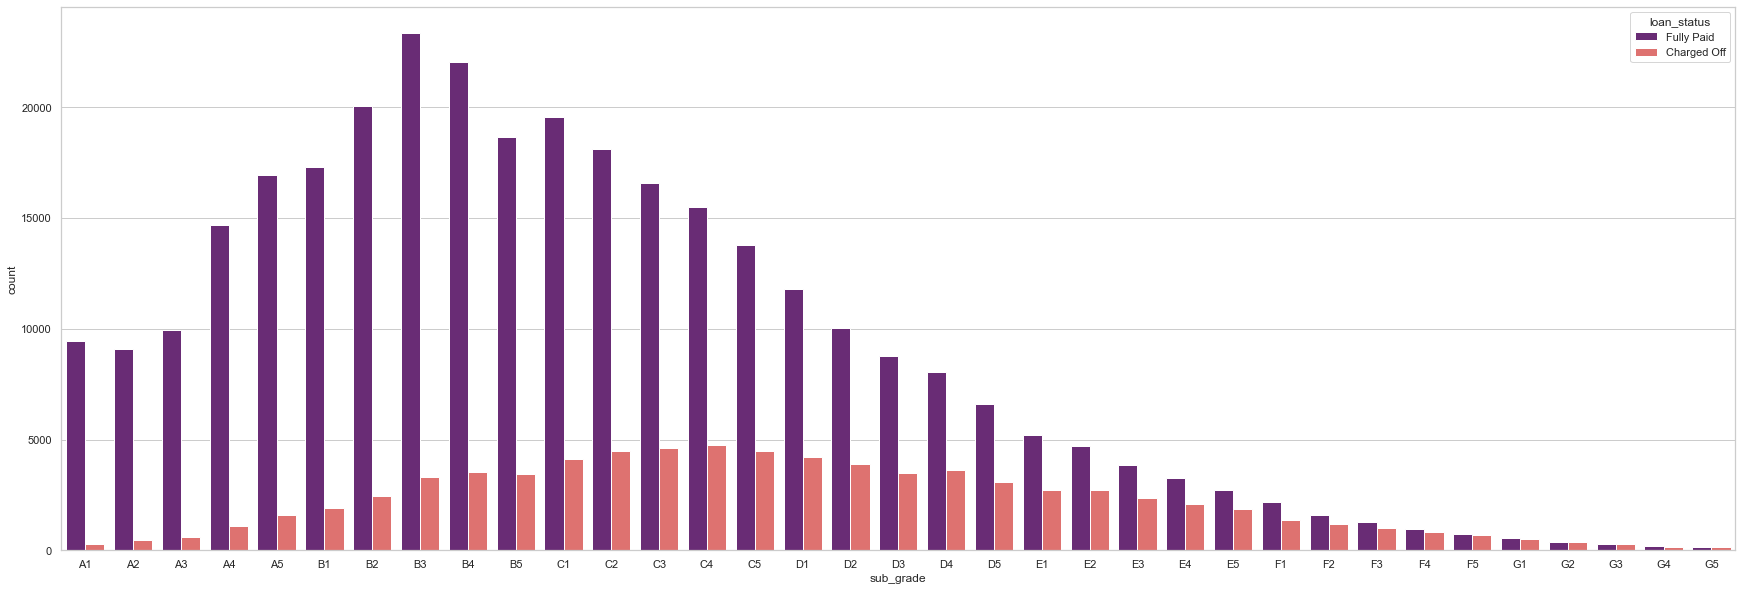

In [10]:
sns.set(style="whitegrid", font_scale=1)
fig, ax1 = plt.subplots(1, 1)
fig1, ax2 = plt.subplots(1, 1)
sns.countplot(data=df,x="grade",ax=ax1)
sns.countplot(data=df,x="sub_grade",ax=ax2,order = sorted(list(df['sub_grade'].unique())),hue = "loan_status",palette='magma')
fig1.set_figheight(10)
fig1.set_figwidth(30)

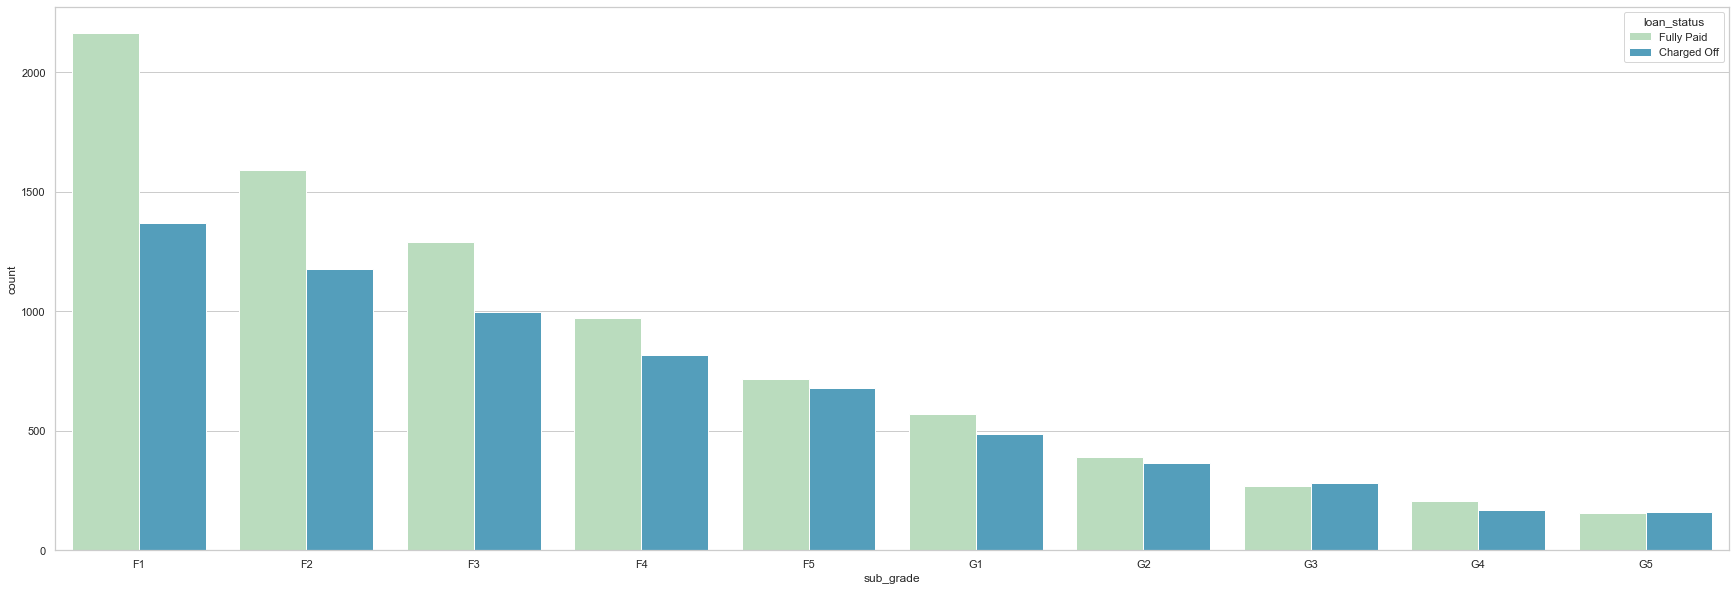

In [11]:
sns.set(style="whitegrid", font_scale=1)
fig2, ax1 = plt.subplots(1, 1)
subgrade_isolate = ['F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3','G4', 'G5']
sns.countplot(data=df, x='sub_grade', order = subgrade_isolate, hue='loan_status', palette='GnBu')
fig2.set_figheight(10)
fig2.set_figwidth(30)

In [12]:
df['loan_repaid'] = df['loan_status'].map({"Fully Paid": 1, "Charged Off": 0})

In [13]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


<AxesSubplot:>

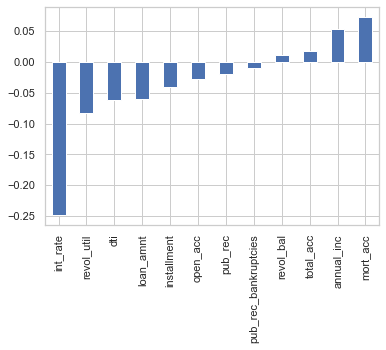

In [14]:
repaid_corr = df.corr()['loan_repaid'].drop('loan_repaid')
repaid_corr.sort_values().plot.bar()

In [15]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [16]:
100 * df.isnull().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [19]:
df['emp_title'].nunique()

173105

In [20]:
display(df["emp_title"])

0                        Marketing
1                  Credit analyst 
2                     Statistician
3                  Client Advocate
4          Destiny Management Inc.
                    ...           
396025            licensed bankere
396026                       Agent
396027                City Carrier
396028        Gracon Services, Inc
396029    Internal Revenue Service
Name: emp_title, Length: 396030, dtype: object

In [21]:
#too many unique titles (173105 titles) to perform encoding so we can drop it
df = df.drop(columns='emp_title')

In [22]:
df['emp_length'].nunique()

11

In [23]:
display(df["emp_length"])

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

<AxesSubplot:xlabel='emp_length', ylabel='count'>

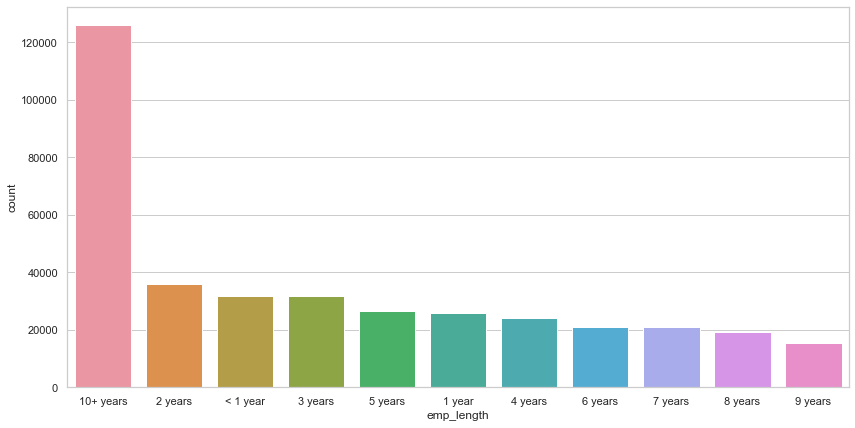

In [24]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize = (14,7))
sns.countplot(data=df,x='emp_length',order = df['emp_length'].value_counts().index)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

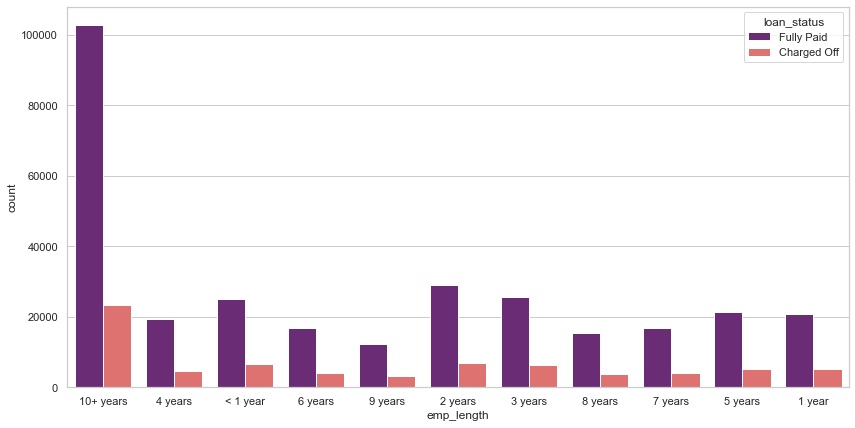

In [25]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize =(14,7))
sns.countplot(data=df, x='emp_length', hue= 'loan_status',palette= "magma")

In [26]:
charged_off = df[df['loan_status']=="Charged Off"]
charged_off = charged_off.groupby("emp_length").count()

In [27]:
fully_paid = df[df['loan_status']=="Fully Paid"]
fully_paid = fully_paid.groupby("emp_length").count()

In [28]:
emp_len = charged_off/(charged_off+fully_paid)
emp_len = emp_len["loan_status"]
emp_len

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

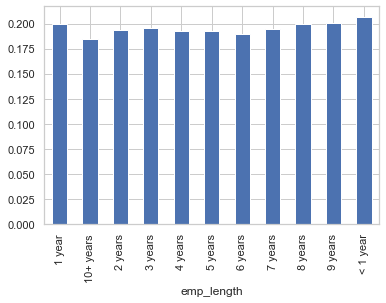

In [29]:
emp_len.plot.bar()

In [30]:
#since the charge off rates are almost the same a difference of approximately less than 0.0125 percent across all employment lengths so we can drop it
df = df.drop(columns='emp_length')

In [31]:
df['title'].head(5)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [32]:
df['purpose'].head(5)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [33]:
df = df.drop(columns='title')

In [34]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [35]:
df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [36]:
#we can use total_acc to impute as it is the most correlated to mort_acc
impute_mort = df.groupby('total_acc').mean()
impute_mort = impute_mort['mort_acc']

In [37]:
df['mort_acc'] = df.apply(lambda x: impute_mort[x['total_acc']] if np.isnan(x['mort_acc']) else x['mort_acc'], axis =1)

In [38]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [39]:
display(df["revol_util"])

0         41.8
1         53.3
2         92.2
3         21.5
4         69.8
          ... 
396025    34.3
396026    95.7
396027    66.9
396028    53.8
396029    91.3
Name: revol_util, Length: 396030, dtype: float64

In [40]:
display(df["pub_rec_bankruptcies"])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
396025    0.0
396026    0.0
396027    0.0
396028    0.0
396029    0.0
Name: pub_rec_bankruptcies, Length: 396030, dtype: float64

In [41]:
df = df.dropna(subset=["revol_util","pub_rec_bankruptcies"],axis=0)

In [42]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [43]:
types = df.select_dtypes(include=['object']).columns
display(types)

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [44]:
df["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [45]:
df['term'] = df['term'].map({" 36 months": 36, " 60 months": 60})
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [46]:
df = df.drop(columns="grade") #we can drop grade as subgrade is a more descriptive version of grade

In [47]:
dumdum = pd.get_dummies(df['sub_grade'],drop_first=True)

In [48]:
df = df.drop(columns='sub_grade')

In [49]:
df = pd.concat([df, dumdum],axis=1)

In [50]:
dumdum = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

In [51]:
df = df.drop(columns=['verification_status', 'application_type','initial_list_status','purpose'])

In [52]:
df = pd.concat([df, dumdum],axis=1)

In [53]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [54]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [55]:
dumdum = pd.get_dummies(df['home_ownership'],drop_first=True)

In [56]:
df = df.drop(columns=['home_ownership'])

In [57]:
df = pd.concat([df, dumdum],axis=1)

In [58]:
df["zip_code"] =df["address"].str[-5:]

In [59]:
dumdum = pd.get_dummies(df['zip_code'],drop_first=True)

In [60]:
df = df.drop(columns=['zip_code'])

In [61]:
df = pd.concat([df, dumdum],axis=1)

In [62]:
df = df.drop(columns=['address'])

In [63]:
df['earliest_cr_year'] = df['earliest_cr_line'].str[-4:]

In [64]:
df = df.drop(columns='earliest_cr_line')

In [65]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '1

In [66]:
df = df.drop(columns=["issue_d","loan_status"])

In [67]:
df = df.dropna(subset=["revol_util","pub_rec_bankruptcies"],axis=0)

In [68]:
X_features = df.drop(columns='loan_repaid')
Y_features = df['loan_repaid']

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_features, test_size=0.2, random_state=101)

In [70]:
scaler = MinMaxScaler()

In [71]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
import tensorflow as tf

In [73]:
X_features.shape

(395219, 78)

In [74]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=78, activation='relu'))
model.add(tf.keras.layers.Dense(units=78, activation='relu'))
model.add(tf.keras.layers.Dense(units=78, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

In [75]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
model.fit(X_train, Y_train, batch_size = 256, epochs = 25,validation_data=(X_test,Y_test.values))

Epoch 1/25
1236/1236 [==============================] - 4s 2ms/step - loss: 0.3545 - val_loss: 0.3323
Epoch 2/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2741 - val_loss: 0.2704
Epoch 3/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2997 - val_loss: 0.2742
Epoch 4/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2964 - val_loss: 0.2781
Epoch 5/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2683 - val_loss: 0.2691
Epoch 6/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2647 - val_loss: 0.2667
Epoch 7/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2644 - val_loss: 0.2715
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2756 - val_loss: 0.3079
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2646 - val_loss: 0.2664
Epoch 10/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.269

In [77]:
model.save('payback_model.h5') 

In [78]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

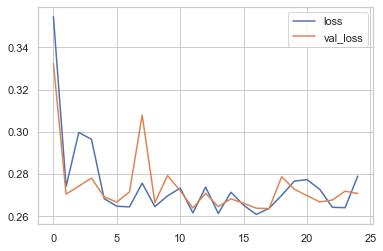

In [79]:
model_loss.plot()

In [80]:
from sklearn.metrics import classification_report,confusion_matrix

In [81]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 2s 895us/step


In [82]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.89      0.89      0.87     79044



In [83]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))
new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.0
term                     60
int_rate              18.24
installment          638.11
annual_inc          61665.0
                     ...   
48052                     0
70466                     0
86630                     0
93700                     0
earliest_cr_year       1996
Name: 305323, Length: 78, dtype: object

In [84]:
(model.predict(new_customer.values.reshape(1,78).astype("float32")) > 0.5).astype("int32")

1/1 [==============================] - 0s 18ms/step


array([[1]])